In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def importImage(dir):
    
    im_array = plt.imread("wallpaper.png")
    im_array = (im_array * 255).astype(np.uint8)
    im_array = im_array[:,:,:3]

    height = np.shape(im_array)[0]
    width = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

In [3]:
image_dir = "./rgb.png"
image0, width, height, channels = importImage(image_dir)
print("image : ", np.shape(image0))

image :  (922, 1920, 3)


In [4]:
data = np.reshape(image0, (height*width, 3))
data0 = np.copy( data )
print("data : ", np.shape(data0))

data :  (1770240, 3)


In [5]:
k = 50
print("k =", k, "\n")

means = data0[np.random.randint(0, height*width, size=k),:]
means0 = np.copy( means )
print("means :")
print(means0, "\n")

k = 50 

means :
[[ 31  40  37]
 [ 45  52  78]
 [ 28  32  41]
 [ 19  36  52]
 [ 14  28  41]
 [ 89  87  98]
 [ 23  33  35]
 [ 29  36  55]
 [ 57  68  74]
 [116 117 135]
 [ 88  70  50]
 [145 167 181]
 [ 16  28  42]
 [108 115 125]
 [ 15  25  37]
 [ 22  32  33]
 [ 42  41  47]
 [ 46  62  75]
 [ 66  80 109]
 [ 65  54  48]
 [ 13  23  35]
 [ 31  34  41]
 [ 48  57  62]
 [ 66  57  42]
 [ 31  41  42]
 [ 28  36  39]
 [ 41  49  52]
 [ 23  22  28]
 [250 255 244]
 [ 13  23  35]
 [ 86  99 107]
 [ 86  68  28]
 [ 36  34  35]
 [ 42  64  78]
 [241 234  57]
 [255 255 235]
 [ 20  24  33]
 [ 77 104 115]
 [ 21  28  34]
 [ 90  65  69]
 [ 26  32  30]
 [ 46  56  57]
 [ 27  32  38]
 [ 36  55  70]
 [ 47  48  42]
 [189 187 172]
 [ 10  17  23]
 [178 129  99]
 [ 14  26  40]
 [143 161 173]] 



In [6]:
def assign(data0, means):
    # 1) get distances from each point to each centroid: array (width*height,k)
    #    (element, dist to centroid i)
    dists = np.zeros( (width*height,k), dtype="int16" )
    for i in range(k):
        dists[:,i] = np.sum( np.power( (data0 - means[i]), 2 ), axis = 1 )
    
    # 2) get closest
    data1 = np.zeros( (width*height,3), dtype="int16" )
    data1 = means[ np.argmin( dists, axis=1 ) ]
    
    return data1

In [7]:
def update( curr_data, original_data, curr_means ):
    new_means = []
    for a in range(k):
        sums = np.sum( np.where( curr_data == curr_means[a], original_data, 0 ), axis=0 )
        elements = np.count_nonzero( np.where( curr_data == curr_means[a], original_data, 0 ), axis=0 )
        new_means.append( np.divide( sums, elements ) )
    
    return np.asarray( new_means, dtype="int16" )

In [8]:
max_iterations = 3
i = 0
while i < max_iterations:
    data = assign(data0, means)
    means = update(data, data0, means)
    i += 1

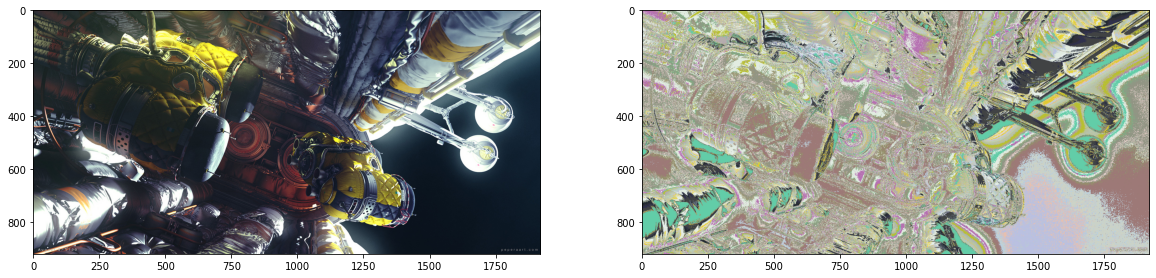

In [9]:
image = np.reshape( data, (height, width, 3) )

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))
ax1.imshow(image0, aspect = "equal")
ax2.imshow(image, aspect = "equal")

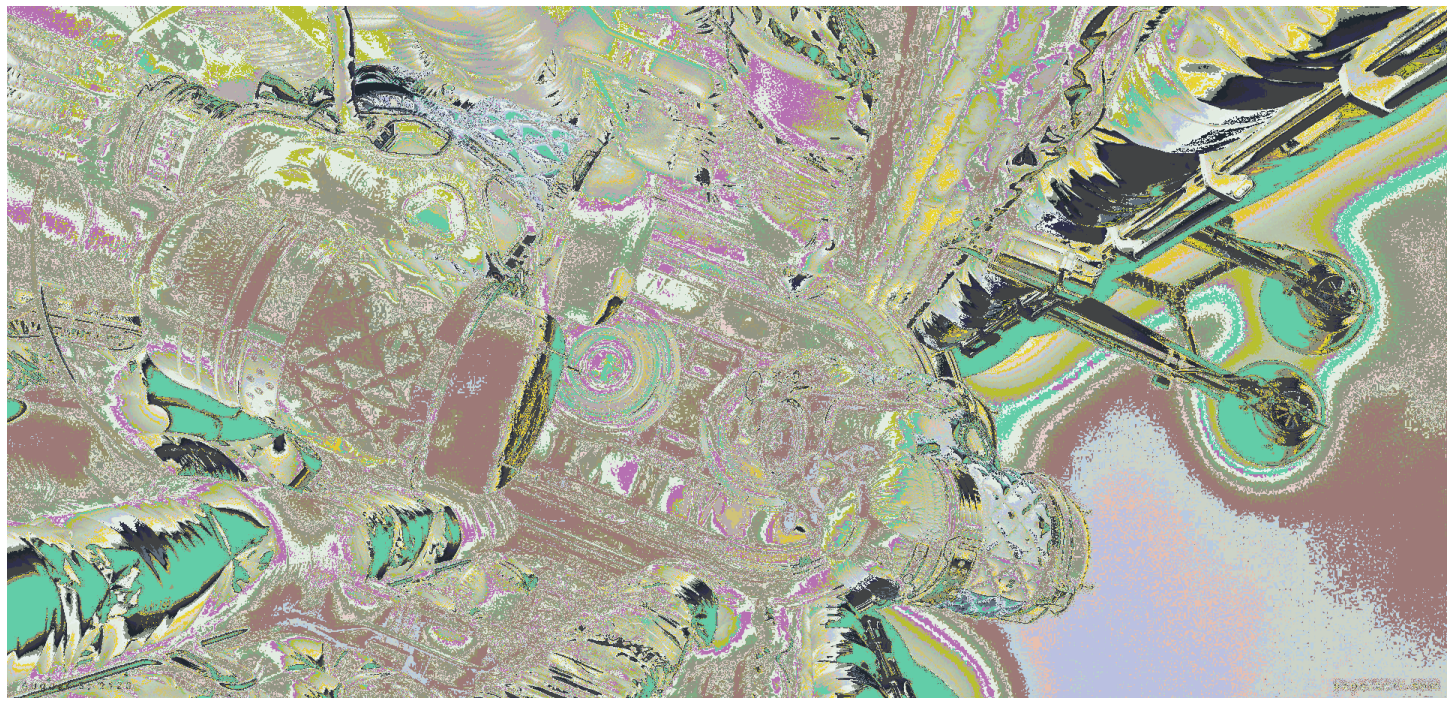

In [10]:
fig = plt.figure(figsize=(20,10), frameon=False)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(image, aspect='equal')
fig.savefig("wallpaper-clusters.png")